In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import jellyfish
%matplotlib inline
import scipy.stats
import sklearn.preprocessing
import webbrowser
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts
import networkx as nx


In [5]:
data=pd.read_csv('C:/Users/jpisel/Downloads/output/NationalNames.csv')
dataf=pd.DataFrame(data)

In [6]:
year=1888
gender="M"
similars=90
sel=dataf[(dataf["Year"]==year) & (dataf["Gender"]==gender)]

In [7]:
compare=np.zeros(shape=(np.shape(sel)[0],np.shape(sel)[0]))
for i in range(0,np.shape(sel)[0]):
    for j in range(0,np.shape(sel)[0]):
        comp=jellyfish.damerau_levenshtein_distance(unicode(sel["Name"].iloc[i]),unicode(sel["Name"].iloc[j]))
        compare[i,j]+=comp

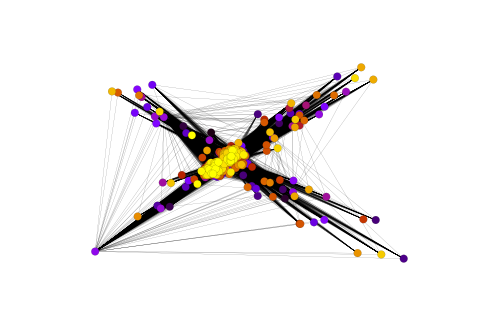

In [8]:
thresh=np.percentile(np.ndarray.flatten(compare*2),similars)
compares=compare*2
counted=pd.DataFrame.as_matrix(dataf[(dataf["Year"]==year) & (dataf["Gender"]==gender)][[4]])
weigh=(np.sum(((compares-np.max(compares))),1)/np.max(np.sum(((compares-np.max(compares))),1)))
combined=counted.flatten()*weigh
secondweight=((combined/np.max(combined))-1)*-100
df2=pd.DataFrame(secondweight)
dataf['secondweight']=pd.Series(secondweight,np.ndarray.flatten(pd.DataFrame.as_matrix(sel[[0]]-1)))

mtemp=np.pad(compare,pad_width=((0,0),(5,0)) ,mode='constant',constant_values=0)
preinverse=scipy.stats.threshold(compare,threshmin=np.percentile(np.ndarray.flatten(compare*2),10))

A=preinverse
G=nx.from_numpy_matrix(A)

pos=nx.spring_layout(G, k=0.000005, iterations=20)
#nx.draw(G,pos)

nx.draw(G,pos, node_color=np.array(G.nodes())+5,node_size=60,cmap=plt.cm.gnuplot, linewidths=.1, width=.1)
plt.savefig("D:/names/"+str(year)+gender+".jpg", format="JPG")

connections=nx.degree_centrality(G)

array = np.empty(shape=(2, len(connections)), dtype=float)
names = 0
values = 1
array[names]=connections.keys()
array[values] = connections.values()

degreeconn=np.ndarray.flatten(array[1::2])

df3=pd.DataFrame(degreeconn)
df3
start=np.ndarray.flatten(pd.DataFrame.as_matrix(sel[[0]]-1))[0]
end=np.ndarray.flatten(pd.DataFrame.as_matrix(sel[[0]]-1))[-1]
dataf['connectivity']=pd.Series(degreeconn,np.ndarray.flatten(pd.DataFrame.as_matrix(sel[[0]]-1)))
datafchunk=dataf[start:end]

datafout=pd.DataFrame.sort(datafchunk, columns='connectivity')
datafout.to_csv("D:/names/"+str(year)+gender+".csv")